## **Pirvision Data Set**
---

This project consists of several stages aimed at training machine learning models. The main steps followed to develop and evaluate the model include:

1. **Exploratory data analysis (EDA)** - Understanding the distribution, patterns, and correlations within the data.
2. **Data preprocessing** - Handling missing values, encoding categorical variables, feature scaling, and addressing class imbalance.
3. **Model Training and Evaluation** – Training multiple ML models and performing a comparative analysis of their performance.
---

### Prerequisites

In [ ]:
# Necessary imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from helper_plots import HelperPlots

# Defining paths for datasets
PIRVISION_DATASET_PATH_TRAIN    = 'datasets/pirvision_office_train.csv'
PIRVISION_DATASET_PATH_TEST     = 'datasets/pirvision_office_test.csv'

# Paths for plots and tables
PIRVISION_DATASET_PATH_TRAIN    = 'datasets/pirvision_office_train.csv'
PIRVISION_DATASET_PATH_TEST     = 'datasets/pirvision_office_test.csv'
PIRVISION_CONTINUE_VARS_TABLE   = 'tables/pirvision_continuous.png'
PIRVISION_DISCRETE_VARS_TABLE   = 'tables/pirvision_discrete.png'
PIRVISION_CONTINUE_VARS_BOXPLOT = 'plots/boxplot_continuous_pirvision.png'
PIRVISION_DISCRETE_VARS_BARPLOT = 'plots/barplot_discrete_pirvision.png'
PIRVISION_LABEL_VARS_BARPLOT    = 'plots/barplot_label_pirvision.png'
PIRVISION_CORRELATION_MATRIX    = 'correlation/pirvision_correlation.png'
PIRVISION_CHI_SQUARE_RESULTS    = 'correlation/chi_square_results_pirvision.png'

---

### Exploratory Data Analysis

In [5]:
# Labels for the attributes in the pirvision dataset
UNLABELED = 'unlabeled'
DISCRETE  = 'discrete'
CONTINUE  = 'continue'
LABEL     = 'label'

Pirvision = {
    'Timestamp' : UNLABELED,
    'Day Index' : DISCRETE,
    'Day' : UNLABELED,
    'Temp (F)' : CONTINUE,
    'Temp (C)' : CONTINUE,
    'OBS_1'  : CONTINUE,
    'OBS_2'  : CONTINUE,
    'OBS_3'  : CONTINUE,
    'OBS_4'  : CONTINUE,
    'OBS_5'  : CONTINUE,
    'OBS_6'  : CONTINUE,
    'OBS_7'  : CONTINUE,
    'OBS_8'  : CONTINUE,
    'OBS_9'  : CONTINUE,
    'OBS_10' : CONTINUE,
    'OBS_11' : CONTINUE,
    'OBS_12' : CONTINUE,
    'OBS_13' : CONTINUE,
    'OBS_14' : CONTINUE,
    'OBS_15' : CONTINUE,
    'OBS_16' : CONTINUE,
    'OBS_17' : CONTINUE,
    'OBS_18' : CONTINUE,
    'OBS_19' : CONTINUE,
    'OBS_20' : CONTINUE,
    'OBS_21' : CONTINUE,
    'OBS_22' : CONTINUE,
    'OBS_23' : CONTINUE,
    'OBS_24' : CONTINUE,
    'OBS_25' : CONTINUE,
    'OBS_26' : CONTINUE,
    'OBS_27' : CONTINUE,
    'OBS_28' : CONTINUE,
    'OBS_29' : CONTINUE,
    'OBS_30' : CONTINUE,
    'OBS_31' : CONTINUE,
    'OBS_32' : CONTINUE,
    'OBS_33' : CONTINUE,
    'OBS_34' : CONTINUE,
    'OBS_35' : CONTINUE,
    'OBS_36' : CONTINUE,
    'OBS_37' : CONTINUE,
    'OBS_38' : CONTINUE,
    'OBS_39' : CONTINUE,
    'OBS_40' : CONTINUE,
    'OBS_41' : CONTINUE,
    'OBS_42' : CONTINUE,
    'OBS_43' : CONTINUE,
    'OBS_44' : CONTINUE,
    'OBS_45' : CONTINUE,
    'OBS_46' : CONTINUE,
    'OBS_47' : CONTINUE,
    'OBS_48' : CONTINUE,
    'OBS_49' : CONTINUE,
    'OBS_50' : CONTINUE,
    'OBS_51' : CONTINUE,
    'OBS_52' : CONTINUE,
    'OBS_53' : CONTINUE,
    'OBS_54' : CONTINUE,
    'OBS_55' : CONTINUE,
    'OBS_56' : CONTINUE,
    'OBS_57' : CONTINUE,
    'Class'  : LABEL
}

In [6]:
df_train = pd.read_csv(PIRVISION_DATASET_PATH_TRAIN)
df_test = pd.read_csv(PIRVISION_DATASET_PATH_TEST)

dataset = pd.concat([df_train, df_test], ignore_index=True)

To begin the dataset exploration, we will perform structured visual and statistical analysis:
- **Continuous** features will be visualized using boxplots to assess their value distributions and _identify potential outliers_.
- **Discrete** features will be explored through barplots, providing insight into the frequency of each category.
- The **target label** will be analyzed as well via a barplot to observe class imbalance, if any.
- Afterwards, a **correlation matrix** for each variable category will be plotted, to examine linear relationships.

### 1.1. Plotting the continuous features

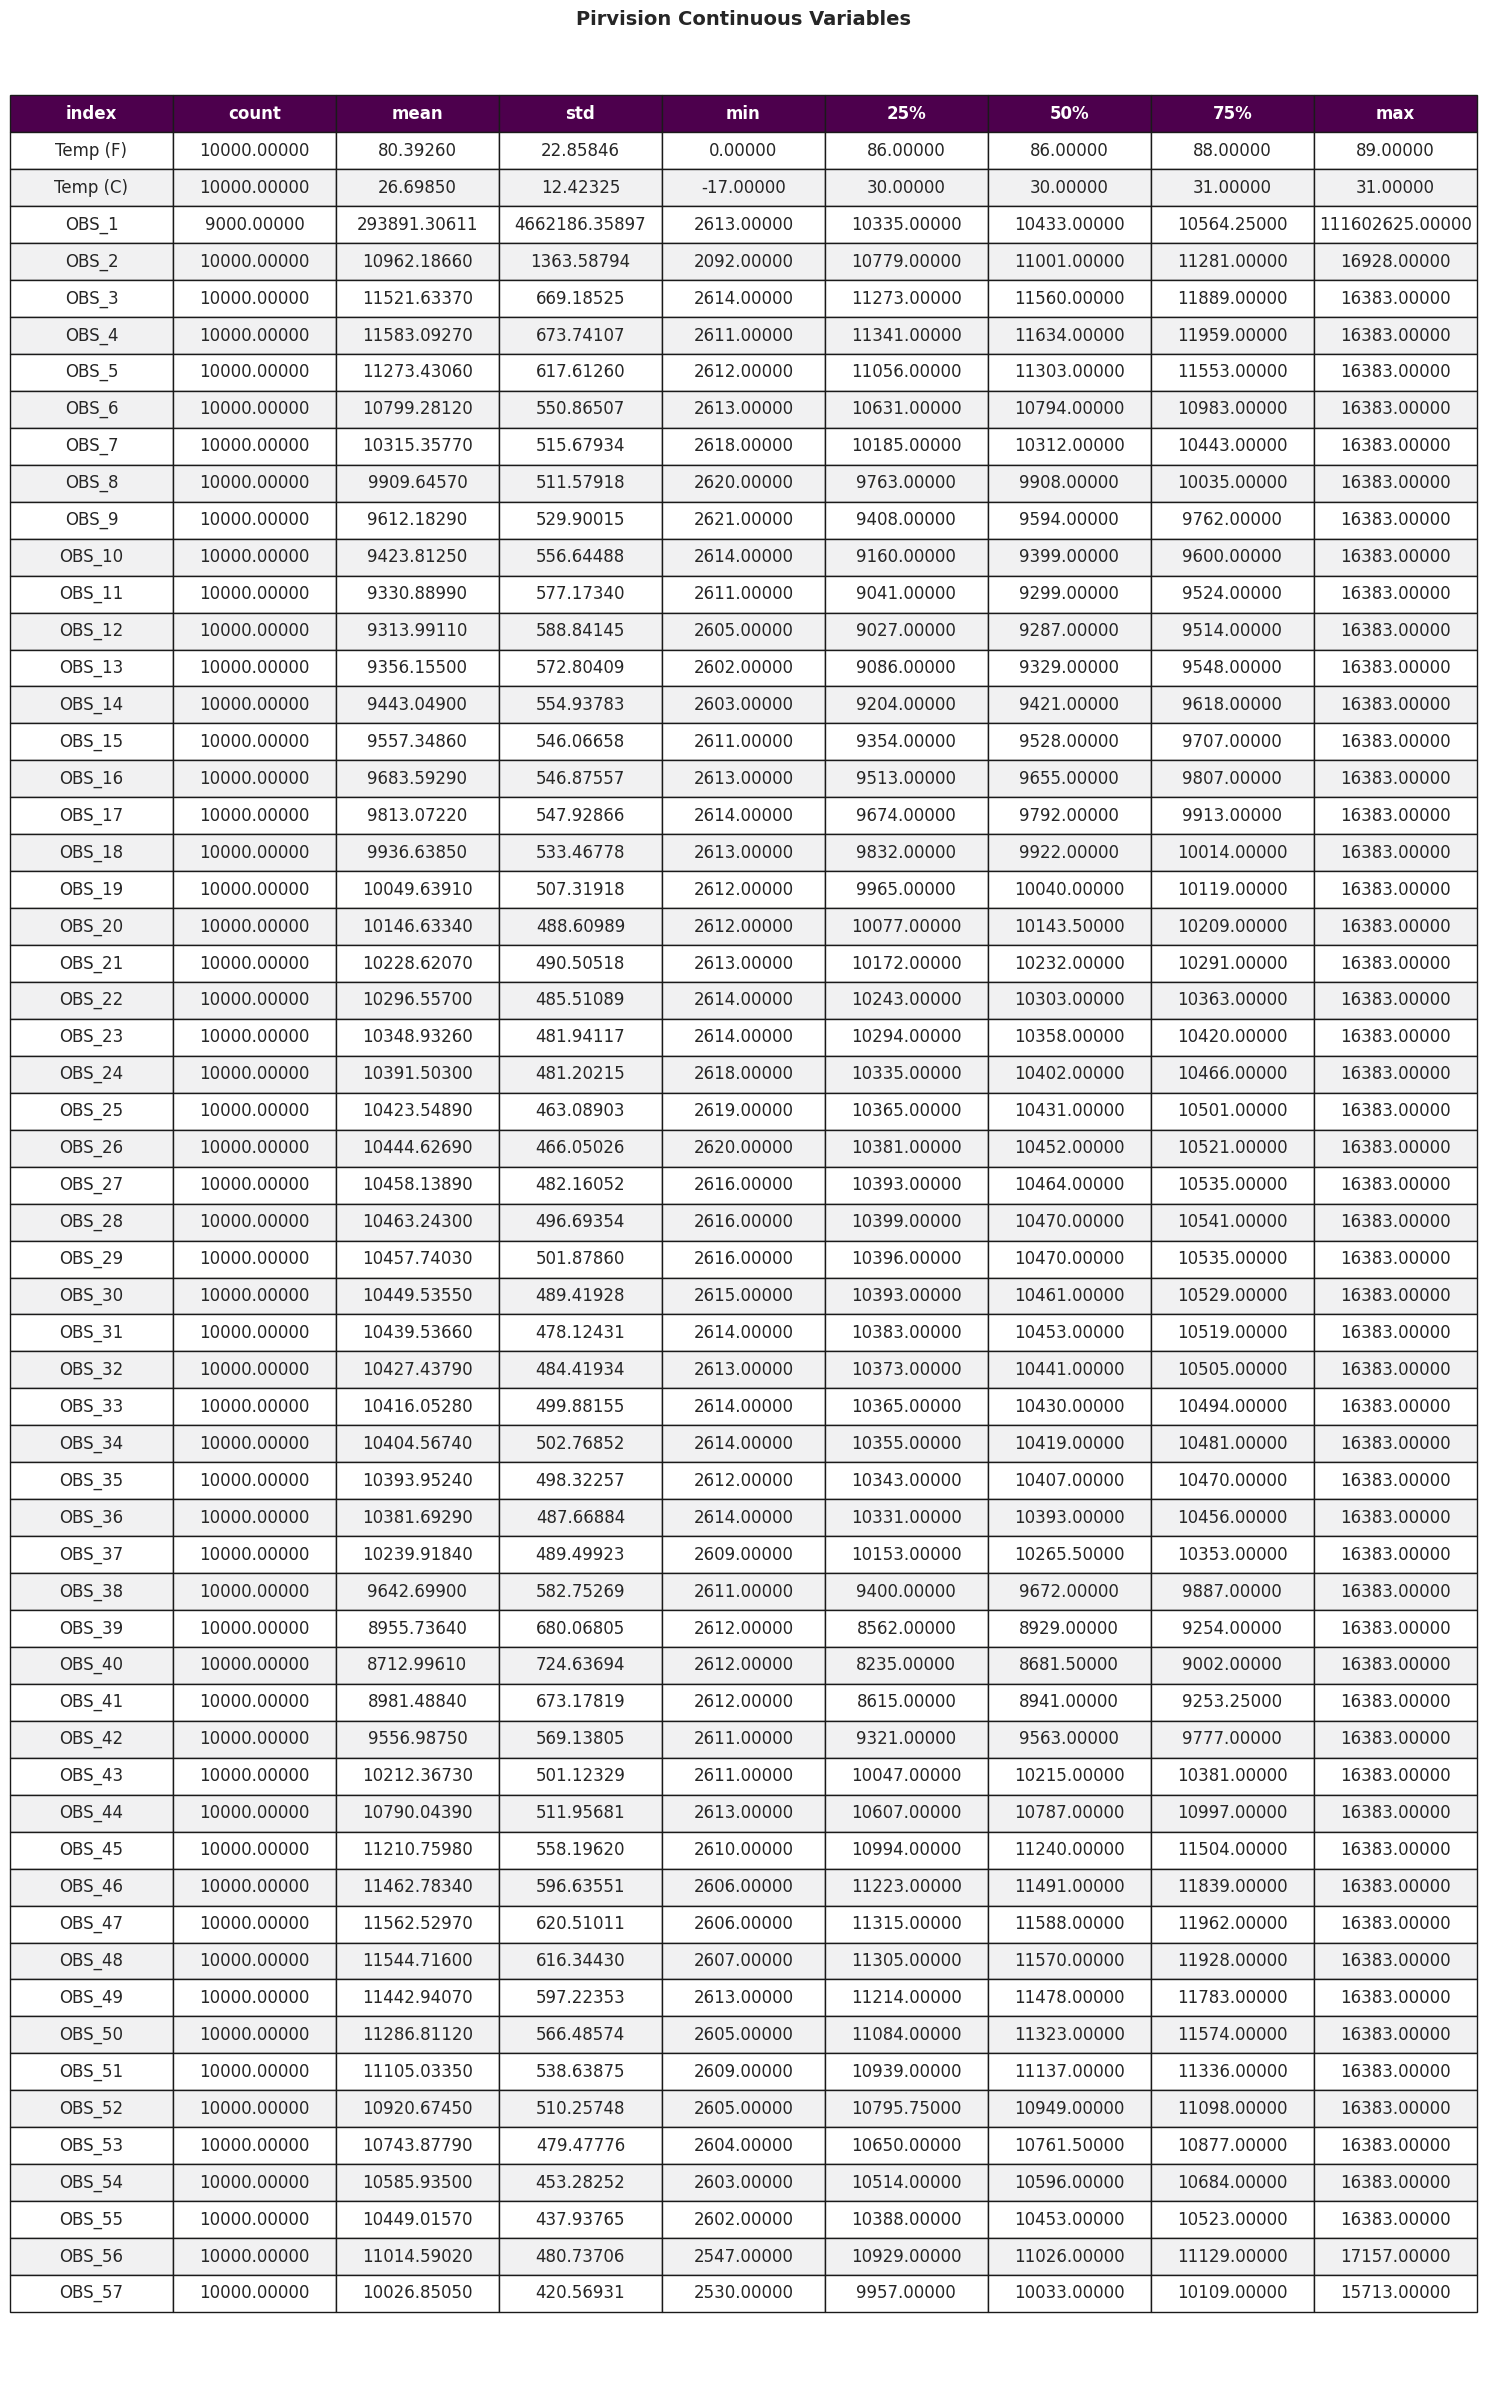

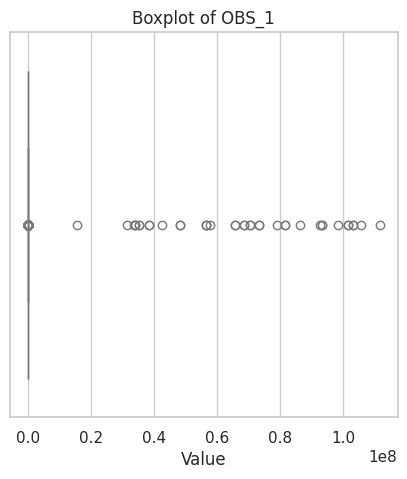

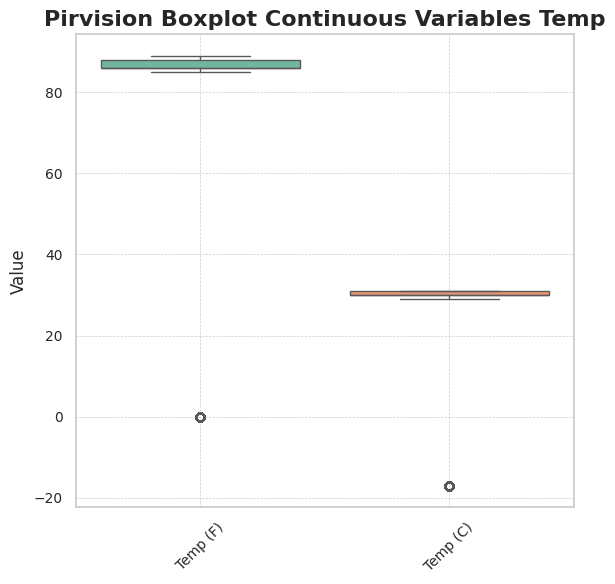

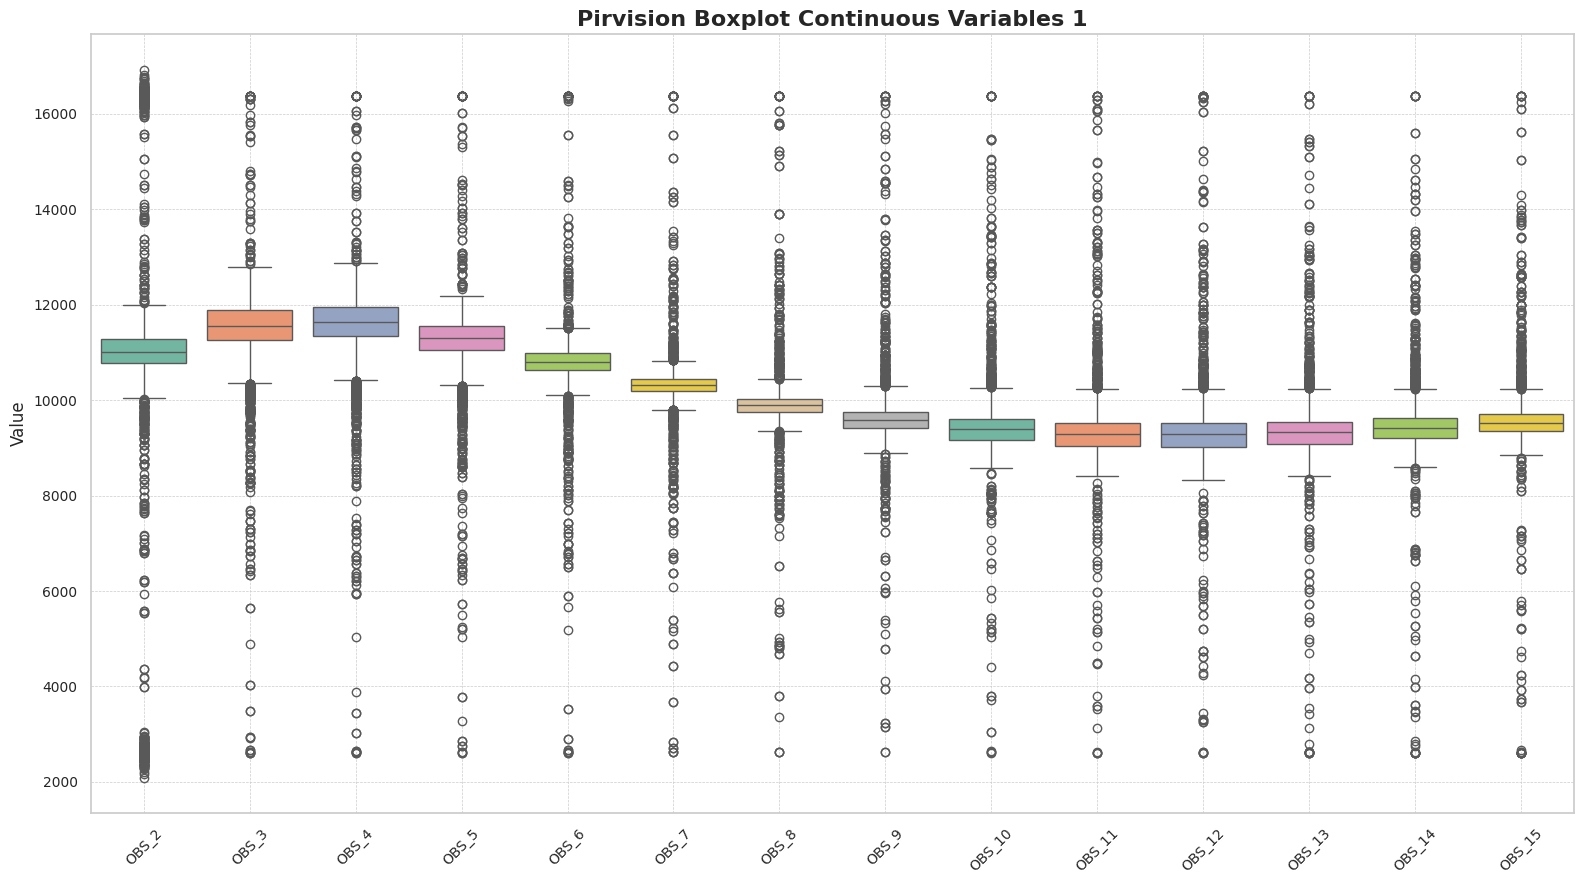

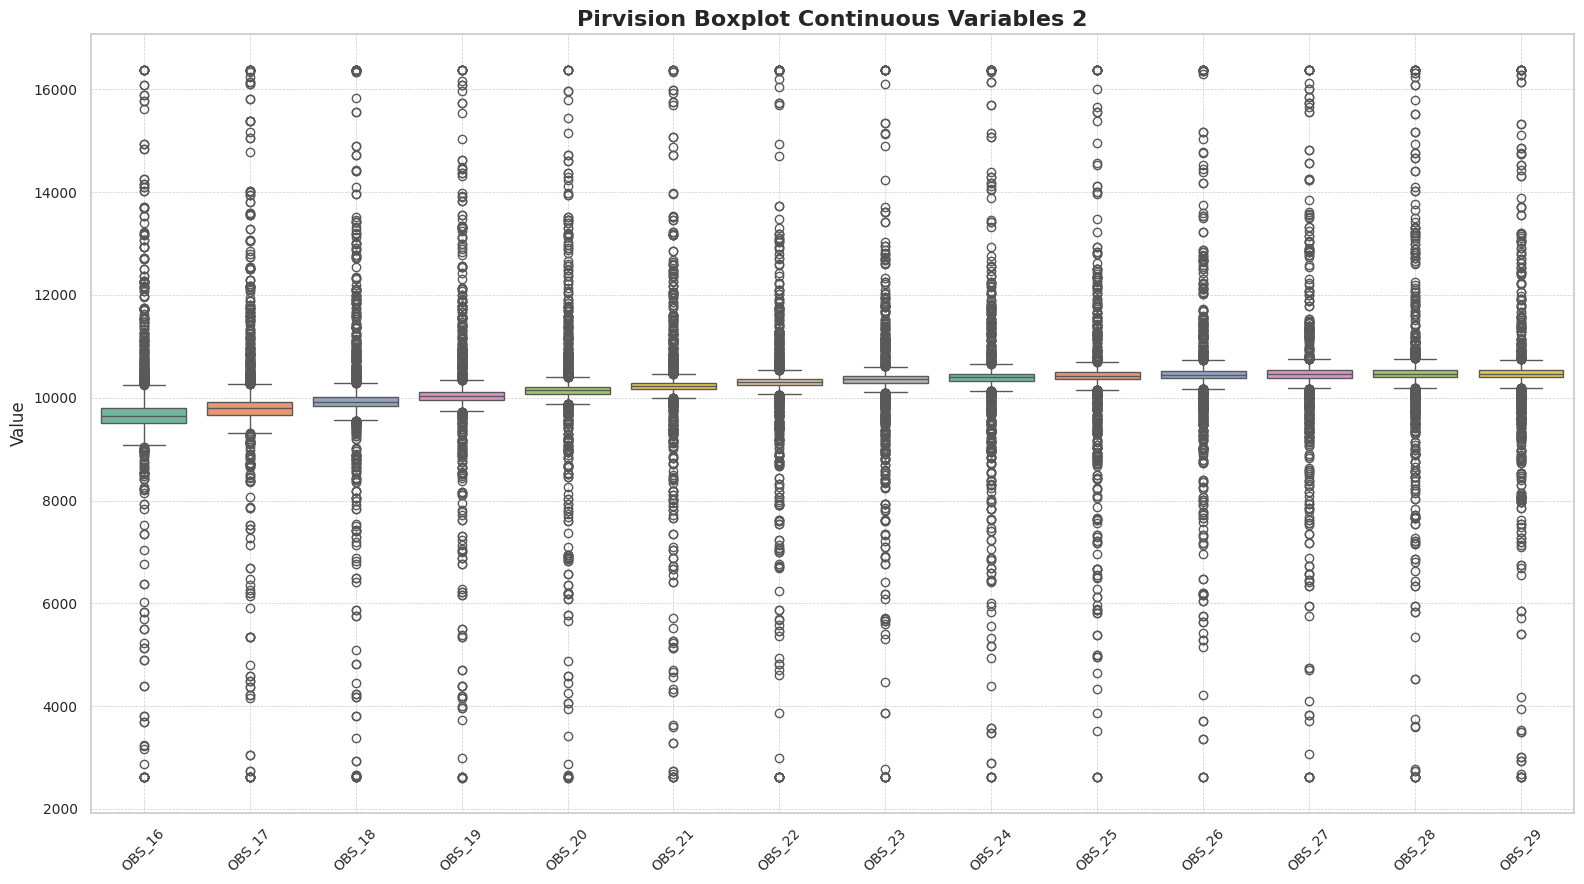

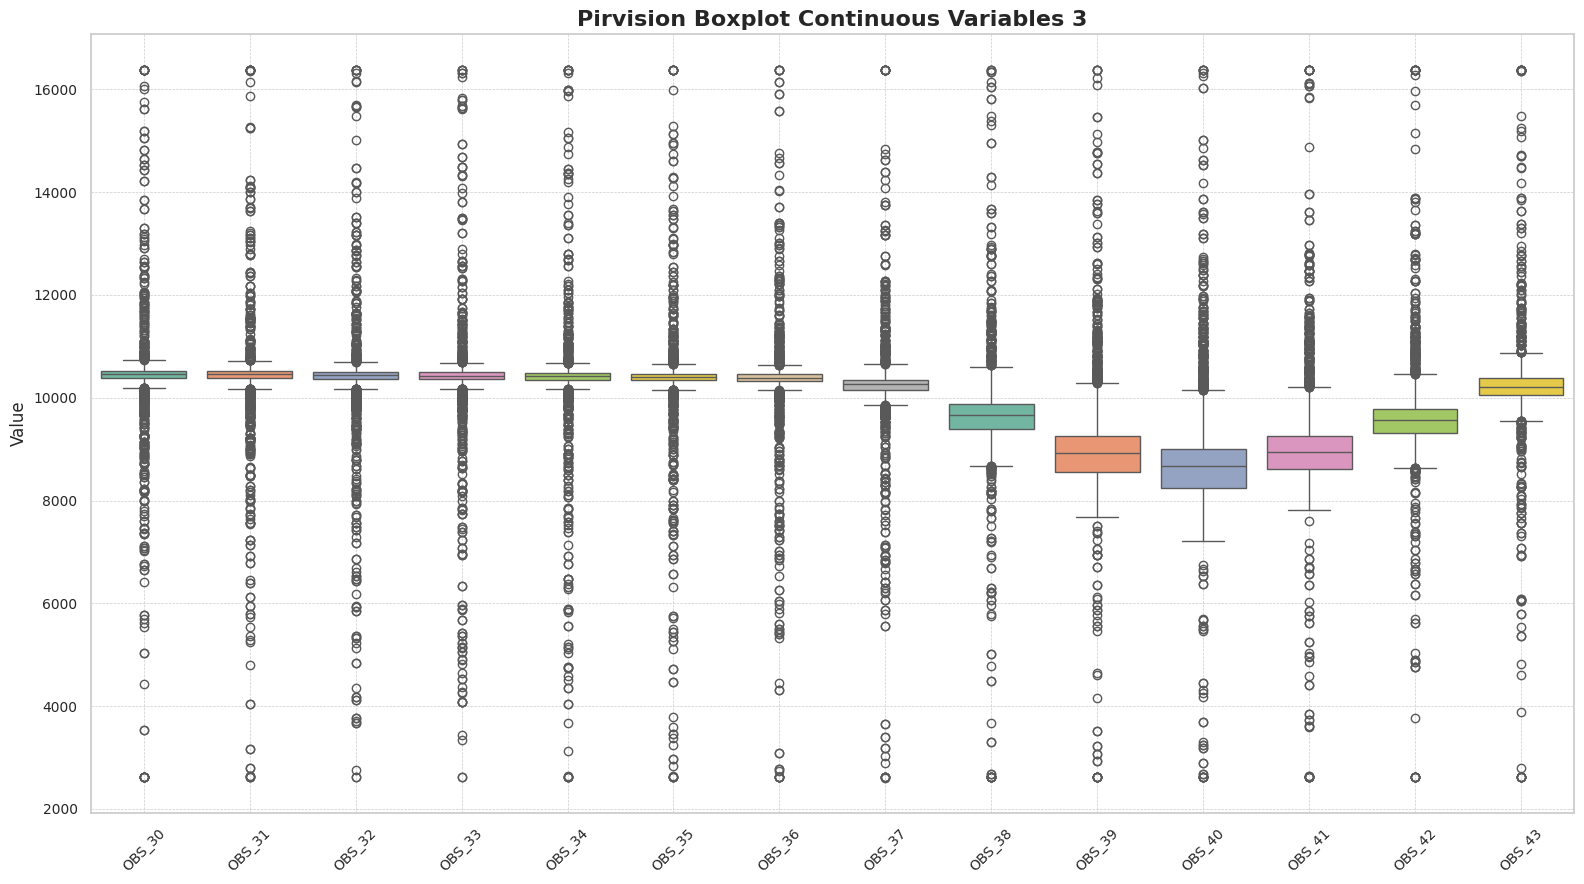

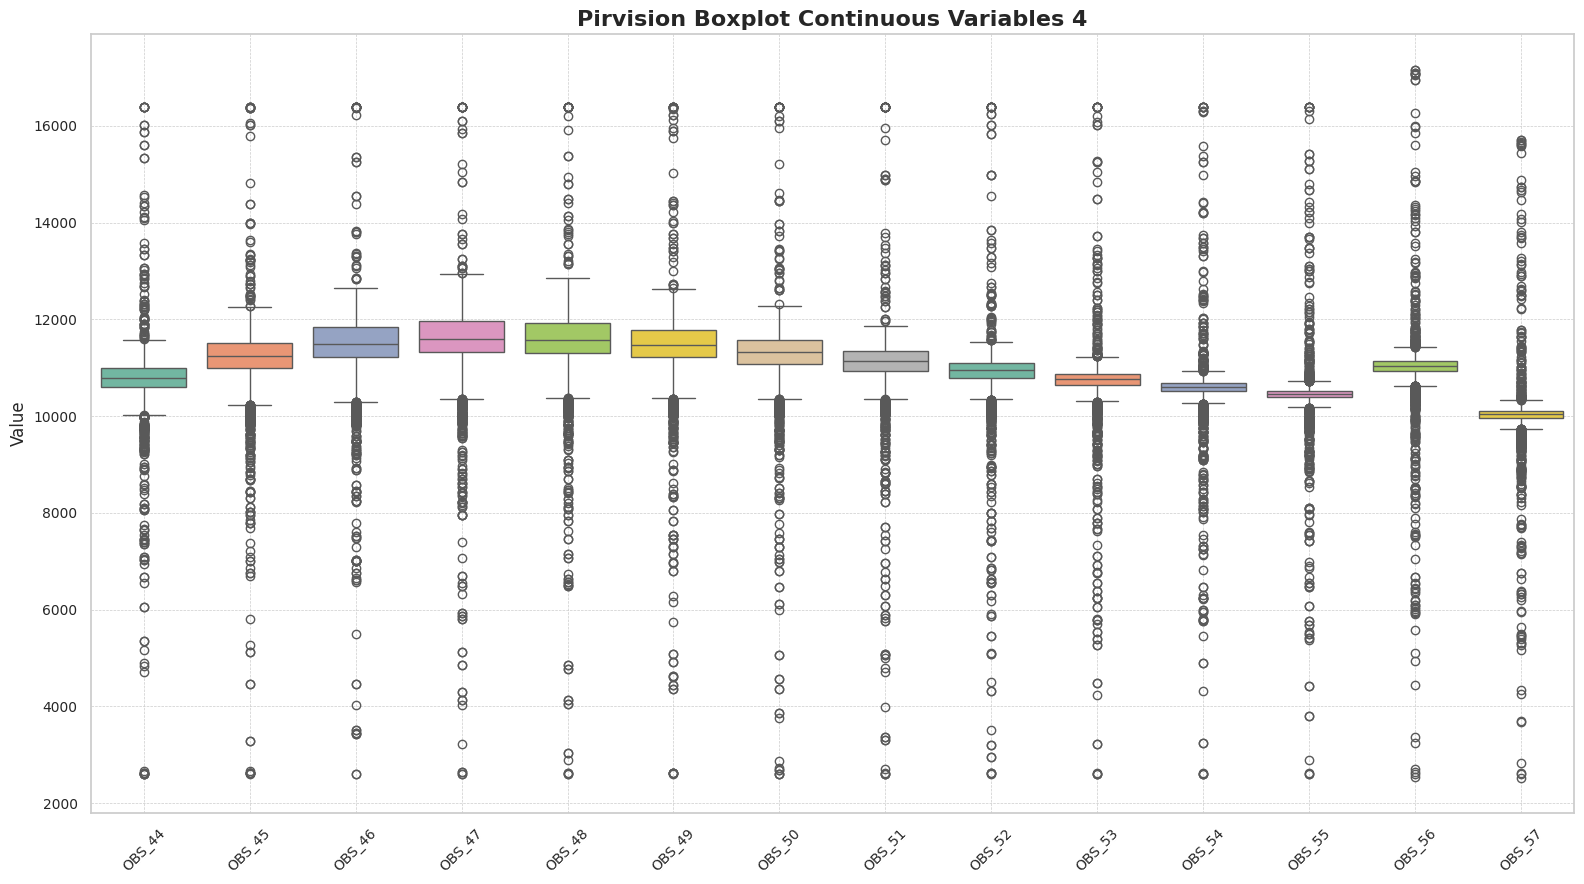

In [9]:
def get_attribute_statistics_continuous(dataset: pd.DataFrame):
    continuous_values = [col for col in dataset if Pirvision[col]==CONTINUE]

    HelperPlots.plot_description_table(dataset[continuous_values].describe().T.reset_index(),title="Pirvision Continuous Variables", outputname=PIRVISION_CONTINUE_VARS_TABLE, figsize=(15, 24))

    # Boxplot only for OBS_1
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=dataset['OBS_1'], color='lightblue')
    plt.title('Boxplot of OBS_1')
    plt.xlabel('Value')
    plt.savefig(PIRVISION_CONTINUE_VARS_BOXPLOT.replace('.png', f'_OBS_1.png'), dpi=300)

    # Boxplot for temperatures
    HelperPlots.plot_boxplot_for_continuous(dataset[['Temp (F)', 'Temp (C)']], title = f"Pirvision Boxplot Continuous Variables Temp", outputname=PIRVISION_CONTINUE_VARS_BOXPLOT.replace('.png', f'_Temp.png'), figsize=(6, 6))

    continuous_values.remove('OBS_1')
    continuous_values.remove('Temp (F)')
    continuous_values.remove('Temp (C)')

    step = 14
    iterations = 4

    for i in range(iterations):
        continuous_vals = continuous_values[i* step:(i+1) * step]
        HelperPlots.plot_boxplot_for_continuous(dataset[continuous_vals], title = f"Pirvision Boxplot Continuous Variables {i + 1}", outputname=PIRVISION_CONTINUE_VARS_BOXPLOT.replace('.png', f'_{i}.png'), figsize=(16, 9))

get_attribute_statistics_continuous(dataset)


### 1.2. Plotting the discrete features

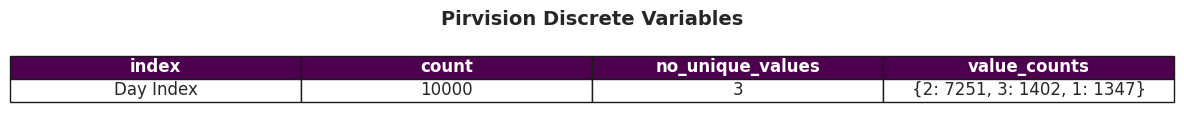

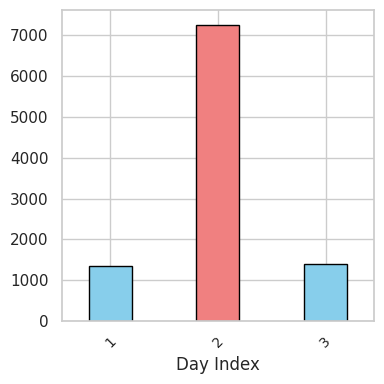

In [10]:
def get_attribute_statistics_discrete(dataset: pd.DataFrame):
    discrete_values   = [col for col in dataset if Pirvision[col]==DISCRETE]

    df_discrete_vals = pd.DataFrame({
        'index': discrete_values,
        'count': [dataset[col].count() for col in discrete_values],
        'no_unique_values': [dataset[col].nunique() for col in discrete_values],
        'value_counts': [dataset[col].value_counts().to_dict() for col in discrete_values]
    })

    # Plotting the value counts for discrete variables
    HelperPlots.plot_description_table(df_discrete_vals, title="Pirvision Discrete Variables", outputname=PIRVISION_DISCRETE_VARS_TABLE, figsize=(12, 1.5))

    # Plotting the barplot for discrete variables
    HelperPlots.plot_barplot_for_discrete(dataset, discrete_values, PIRVISION_DISCRETE_VARS_BARPLOT)

get_attribute_statistics_discrete(dataset)

### 1.3. Plotting distribution for target label

Barplot for label variable


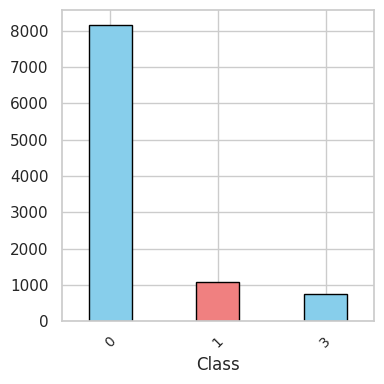

In [12]:
def get_label_statistics(dataset: pd.DataFrame):
    label_vals = [col for col in dataset if Pirvision[col]==LABEL]

    print("Barplot for label variable")
    HelperPlots.plot_barplot_for_discrete(dataset, label_vals, PIRVISION_LABEL_VARS_BARPLOT)

get_label_statistics(dataset)

### 1.4. Analyzing correlation matrix

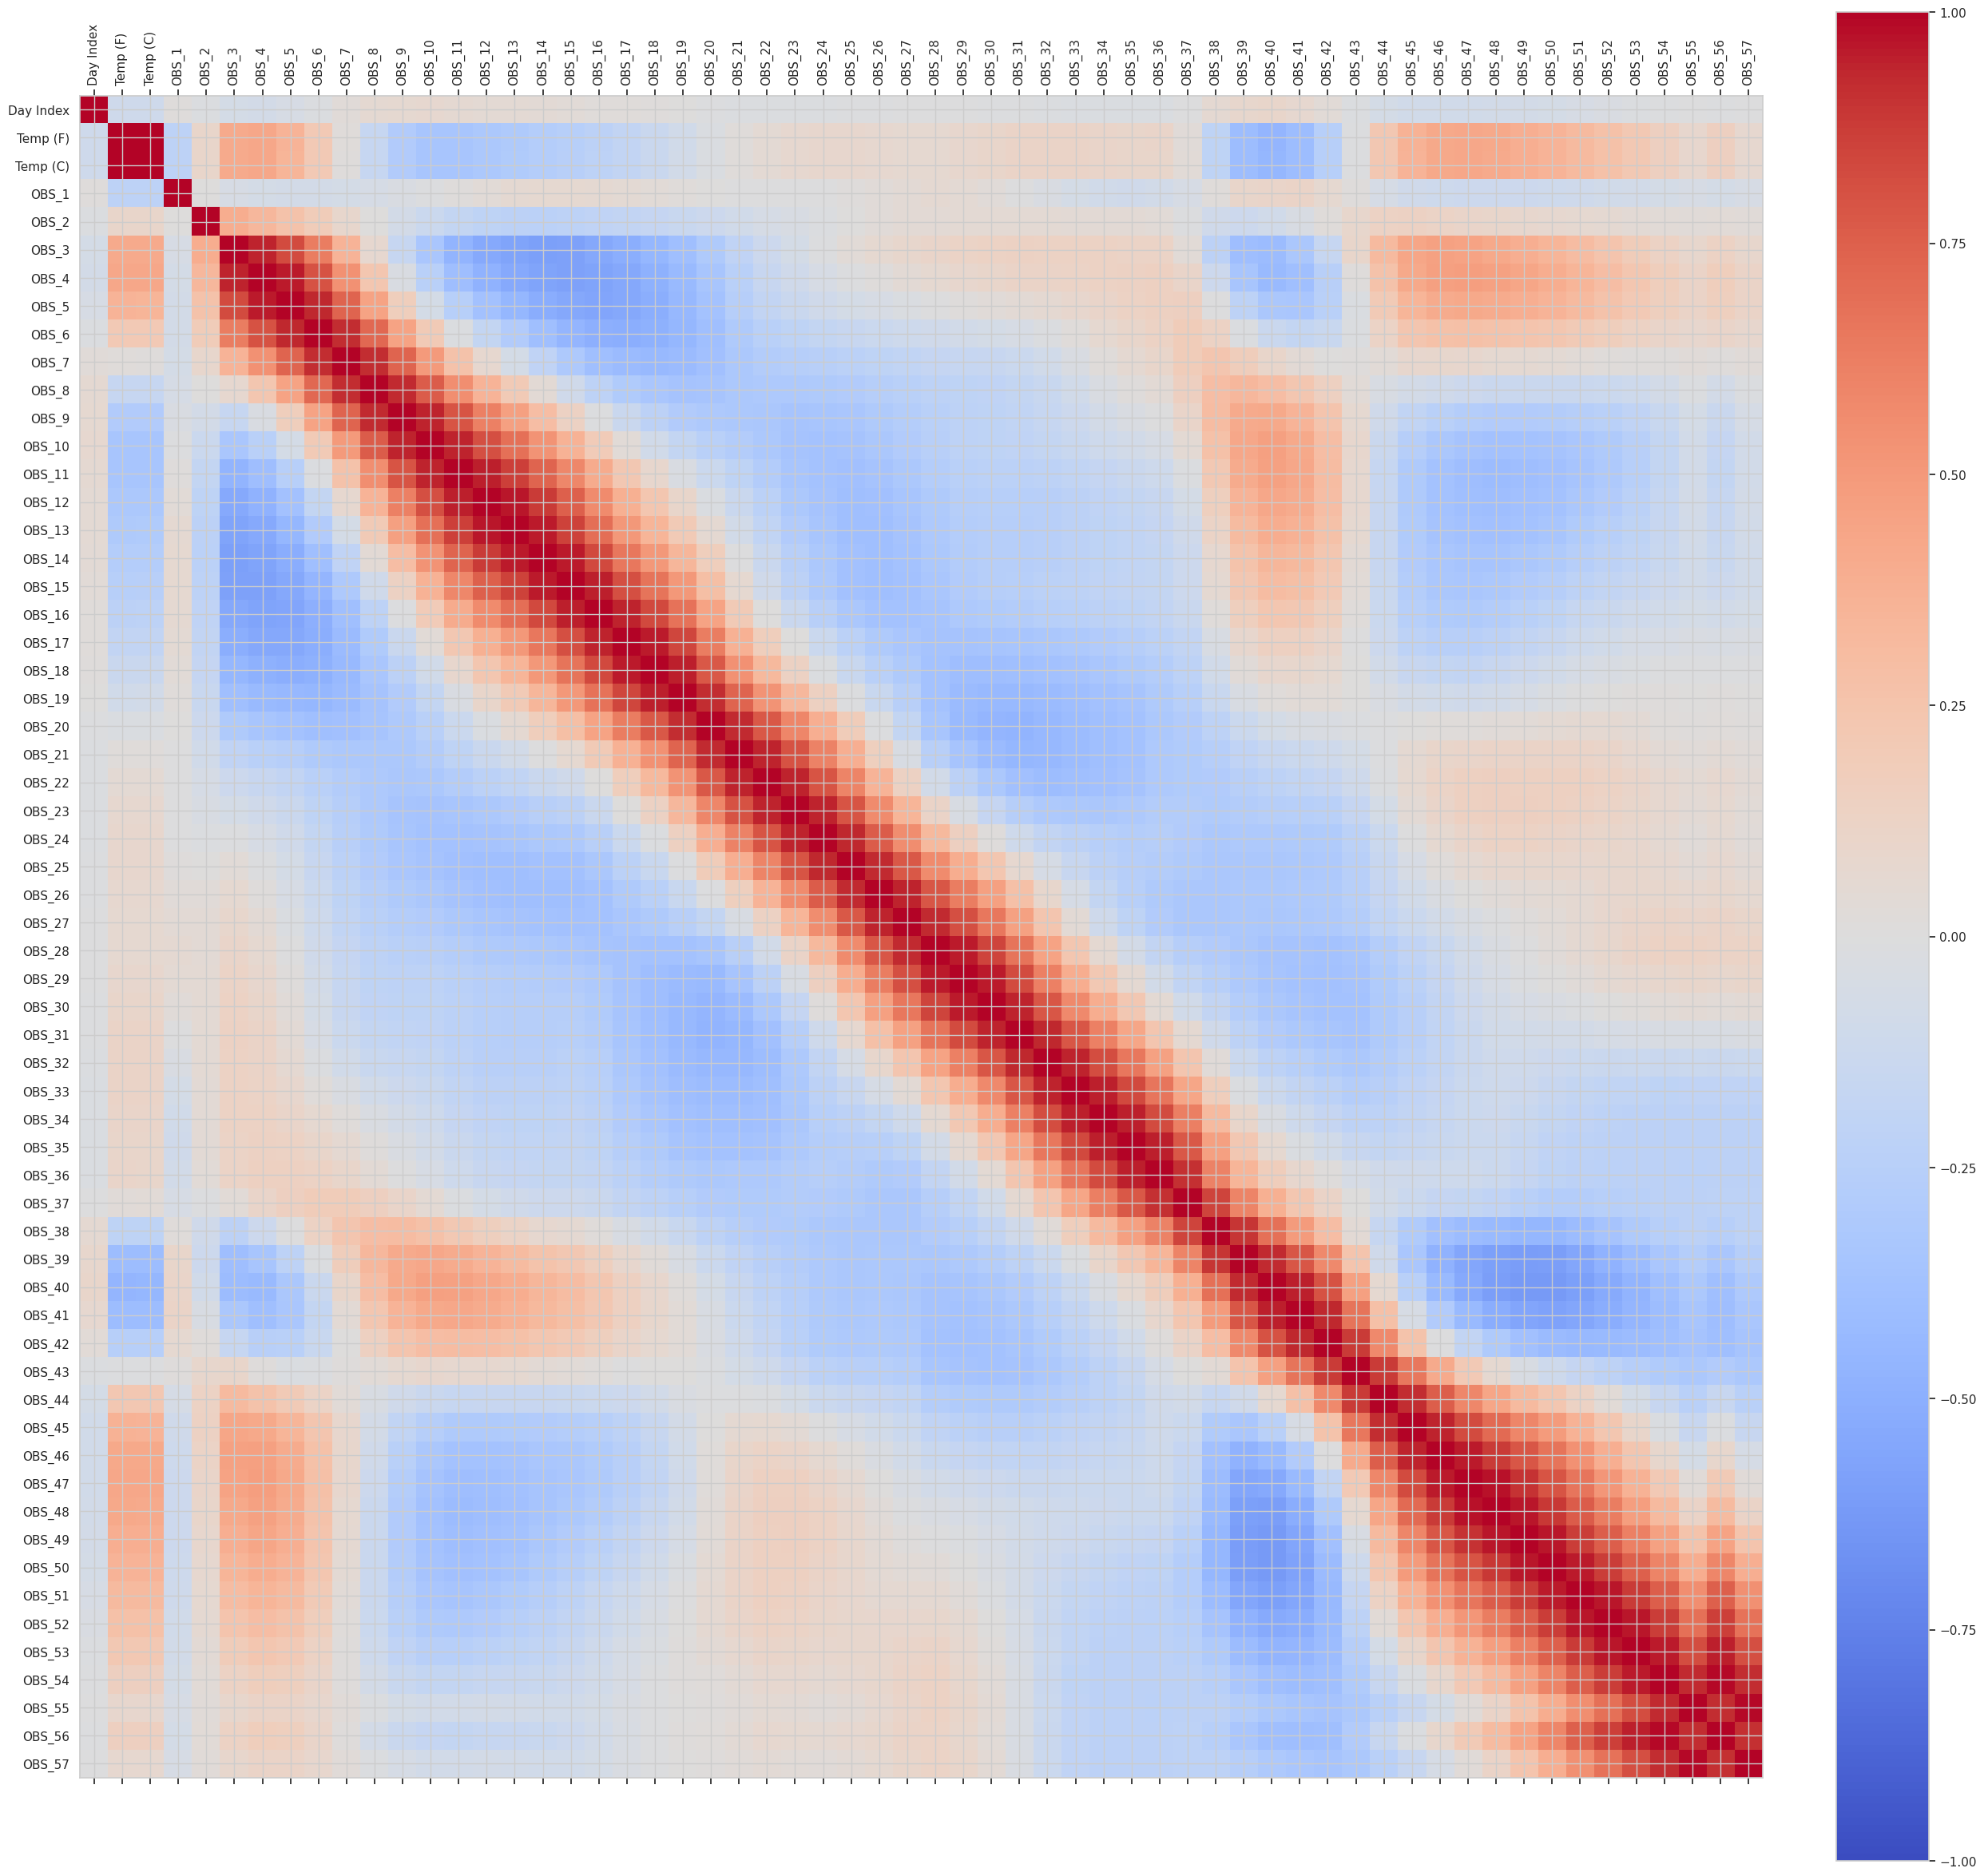

In [ ]:
def get_correlation_statistics(dataset: pd.DataFrame):
    columns = [col for col in dataset if not Pirvision[col] in [UNLABELED, LABEL]]
    correlation_matrix = dataset[columns].corr(method='pearson')

    HelperPlots.plot_correlation_matrix(correlation_matrix, PIRVISION_CORRELATION_MATRIX, figsize=(25, 25))

get_correlation_statistics(dataset)

Because in this dataset was only one discrete attribute, the chi-squared test wasn't performed and the discrete attribute was included in the correlation matrix alongside the continuous features. 

---

## 2. Data preprocessing

In [ ]:
df_train_X = df_train.drop(columns=['Class'])
df_train_y = df_train['Class']

df_test_X = df_test.drop(columns=['Class'])
df_test_y = df_test['Class']